In [4]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4

In [6]:
plt.style.use('ggplot')

In [2]:
%cd Desktop/


/Users/jimdoone/Desktop


In [3]:
%ls

Desktop/
Desktop_Data/
Icon?
Jobs/
PVPMC/
Python/
SCREEN_SHOTS/
choosing_colors.pdf
jamesbond.csv
kc_house_data.csv*
machine/
pandas_data_files/
test.csv
train.csv
~$E POSITION .docx
~$EDExercise 1 Simple Project Finance Model.xlsm
~$Excel2013StatisticsChapter07.xlsm
~$Fred_2013.xlam
~$HCA.xlsx
~$P90, P99 etc Analysis.xlsx
~$Python.docx
~$Read PDF to Excel.xlsm
~$Risk_2.xlsx
~$Solar Model Version 3.xlsm
~$anddo_Excel_notes.docx
~$ats_notes.docx
~$ergy Primer.docx
~$mes_Doone_Alcen_CL.docx
~$mes_Doone_Tesla.docx
~$n_Leffern__Mark_20150227 (1).docx
~$oone_CSE_CL.docx
~$oone_Duq.docx
~$rect Current Transmission Lines.docx


In [32]:
df = pd.read_csv('train.csv')
df.drop('Id', axis=1, inplace=True)
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


##### Shape

In [33]:
print(f'df.csv shape is {df.shape}')

df.csv shape is (1460, 80)


##### Duplicates

In [35]:
#df.Id 
idsUnique = len(set(df.index))
idsTotal = df.shape[0]
idsDupli = idsTotal - idsUnique
print(f"There are {idsDupli} duplicate IDS for {idsTotal} total entries")

There are 0 duplicate IDS for 1460 total entries


##### Preprocessing
##### Outliers

In [36]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

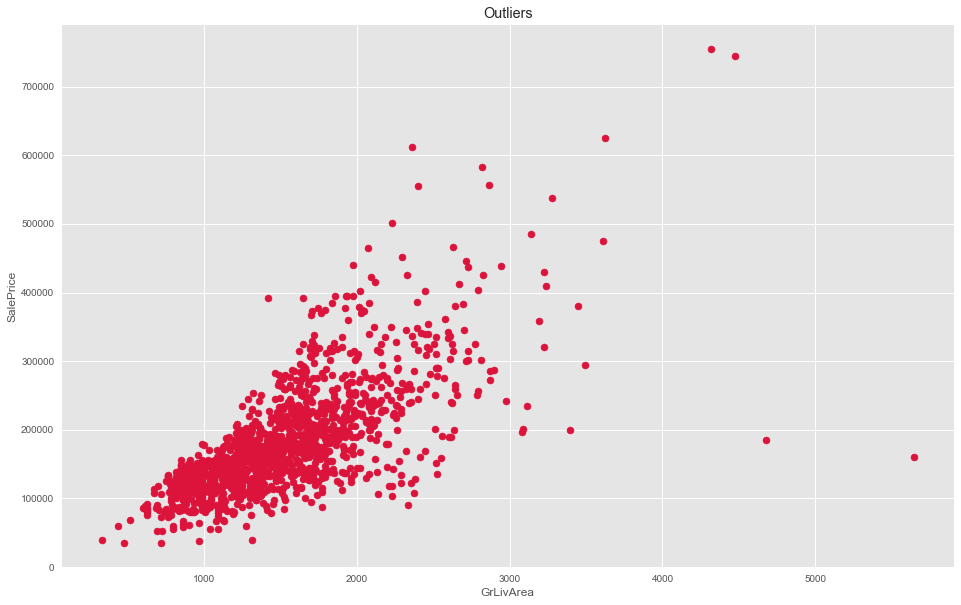

In [37]:
plt.figure(figsize=(16,10))
plt.scatter(df['GrLivArea'], df['SalePrice'], c='crimson')
plt.title('Outliers')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [38]:
df = df[df['GrLivArea'] < 4000]

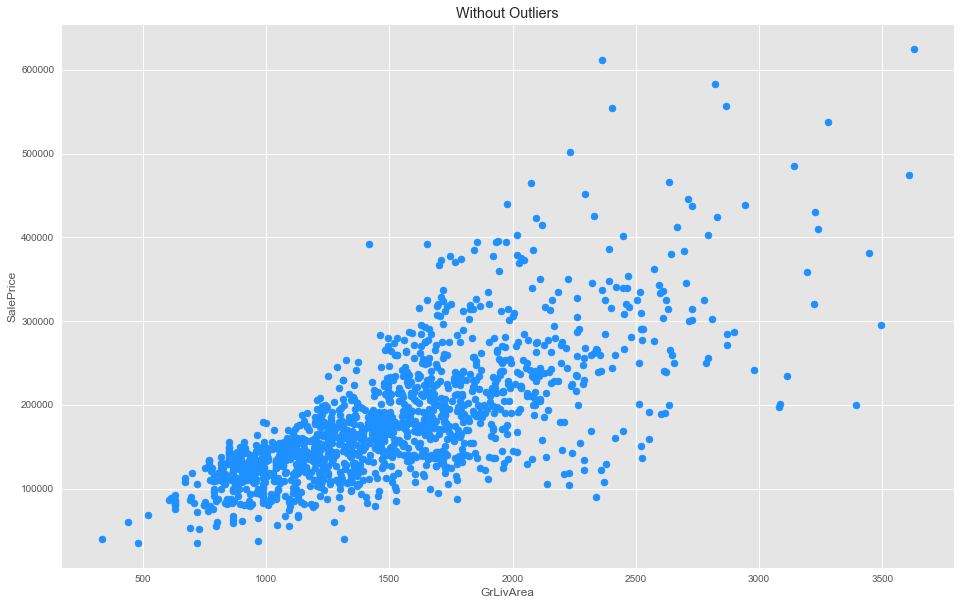

In [39]:
plt.figure(figsize=(16,10))
plt.scatter(df['GrLivArea'], df['SalePrice'], c='dodgerblue')
plt.title('Without Outliers')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

##### Log Transform Price
- Return the natural logarithm of one plus the input array, element-wise.

In [40]:
df['SalePrice'] = np.log1p(df['SalePrice'])

/Users/jimdoone/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
y = df['SalePrice']


##### Missing Values

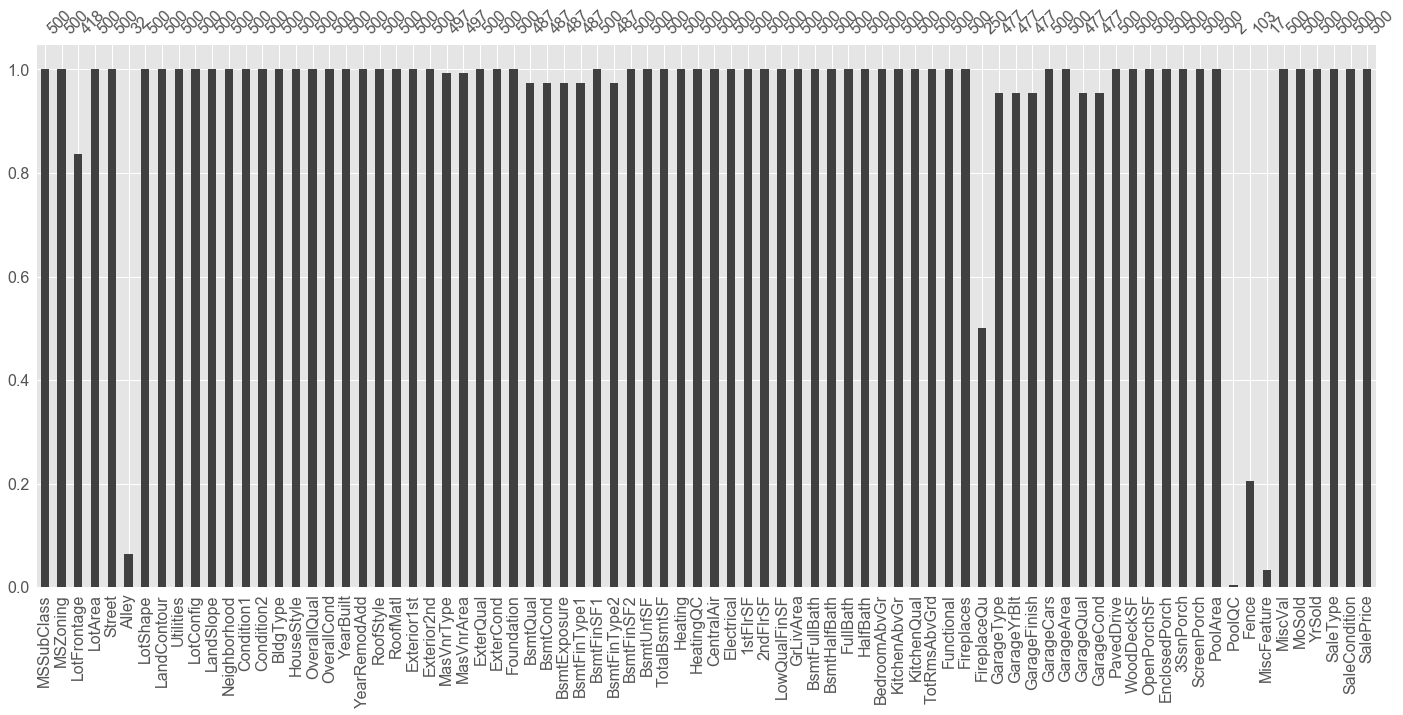

In [42]:
import missingno as msno
msno.bar(df.sample(500))

In [43]:
# Alley : data description says NA means "no alley access"
df.loc[:, "Alley"] = df.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
df.loc[:, "BedroomAbvGr"] = df.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
df.loc[:, "BsmtQual"] = df.loc[:, "BsmtQual"].fillna("No")
df.loc[:, "BsmtCond"] = df.loc[:, "BsmtCond"].fillna("No")
df.loc[:, "BsmtExposure"] = df.loc[:, "BsmtExposure"].fillna("No")
df.loc[:, "BsmtFinType1"] = df.loc[:, "BsmtFinType1"].fillna("No")
df.loc[:, "BsmtFinType2"] = df.loc[:, "BsmtFinType2"].fillna("No")
df.loc[:, "BsmtFullBath"] = df.loc[:, "BsmtFullBath"].fillna(0)
df.loc[:, "BsmtHalfBath"] = df.loc[:, "BsmtHalfBath"].fillna(0)
df.loc[:, "BsmtUnfSF"] = df.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
df.loc[:, "CentralAir"] = df.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
df.loc[:, "Condition1"] = df.loc[:, "Condition1"].fillna("Norm")
df.loc[:, "Condition2"] = df.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
df.loc[:, "EnclosedPorch"] = df.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
df.loc[:, "ExterCond"] = df.loc[:, "ExterCond"].fillna("TA")
df.loc[:, "ExterQual"] = df.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
df.loc[:, "Fence"] = df.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
df.loc[:, "FireplaceQu"] = df.loc[:, "FireplaceQu"].fillna("No")
df.loc[:, "Fireplaces"] = df.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
df.loc[:, "Functional"] = df.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
df.loc[:, "GarageType"] = df.loc[:, "GarageType"].fillna("No")
df.loc[:, "GarageFinish"] = df.loc[:, "GarageFinish"].fillna("No")
df.loc[:, "GarageQual"] = df.loc[:, "GarageQual"].fillna("No")
df.loc[:, "GarageCond"] = df.loc[:, "GarageCond"].fillna("No")
df.loc[:, "GarageArea"] = df.loc[:, "GarageArea"].fillna(0)
df.loc[:, "GarageCars"] = df.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
df.loc[:, "HalfBath"] = df.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
df.loc[:, "HeatingQC"] = df.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
df.loc[:, "KitchenAbvGr"] = df.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
df.loc[:, "KitchenQual"] = df.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
df.loc[:, "LotFrontage"] = df.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
df.loc[:, "LotShape"] = df.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
df.loc[:, "MasVnrType"] = df.loc[:, "MasVnrType"].fillna("None")
df.loc[:, "MasVnrArea"] = df.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
df.loc[:, "MiscFeature"] = df.loc[:, "MiscFeature"].fillna("No")
df.loc[:, "MiscVal"] = df.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
df.loc[:, "OpenPorchSF"] = df.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
df.loc[:, "PavedDrive"] = df.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
df.loc[:, "PoolQC"] = df.loc[:, "PoolQC"].fillna("No")
df.loc[:, "PoolArea"] = df.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
df.loc[:, "SaleCondition"] = df.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
df.loc[:, "ScreenPorch"] = df.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
df.loc[:, "TotRmsAbvGrd"] = df.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
df.loc[:, "Utilities"] = df.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
df.loc[:, "WoodDeckSF"] = df.loc[:, "WoodDeckSF"].fillna(0)

/Users/jimdoone/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [44]:
# Some numerical features are actually really categories
df = df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [45]:
# Encode some categorical features as ordered numbers when there is information in the order
df = df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [46]:
# Create new features
# 1* Simplifications of existing features
df["SimplOverallQual"] = df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df["SimplOverallCond"] = df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df["SimplPoolQC"] = df.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
df["SimplGarageCond"] = df.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df["SimplGarageQual"] = df.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplFunctional"] = df.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
df["SimplKitchenQual"] = df.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplHeatingQC"] = df.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["SimplBsmtFinType1"] = df.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["SimplBsmtFinType2"] = df.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["SimplBsmtCond"] = df.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["SimplBsmtQual"] = df.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["SimplExterCond"] = df.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["SimplExterQual"] = df.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })


In [47]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice            1.000
OverallQual          0.819
GrLivArea            0.719
SimplOverallQual     0.708
ExterQual            0.681
GarageCars           0.680
KitchenQual          0.667
GarageArea           0.655
TotalBsmtSF          0.642
SimplExterQual       0.636
BsmtQual             0.615
1stFlrSF             0.614
SimplKitchenQual     0.610
SimplBsmtQual        0.594
FullBath             0.591
YearBuilt            0.589
YearRemodAdd         0.569
FireplaceQu          0.547
GarageYrBlt          0.544
TotRmsAbvGrd         0.533
SimplFireplaceQu     0.515
Fireplaces           0.487
HeatingQC            0.474
MasVnrArea           0.426
SimplHeatingQC       0.398
BsmtFinSF1           0.383
GarageQual           0.365
GarageCond           0.359
BsmtExposure         0.333
BsmtFinType1         0.333
                     ...  
LotArea              0.259
BsmtFullBath         0.239
BsmtUnfSF            0.223
SimplBsmtCond        0.204
Bedroom

In [48]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = df.select_dtypes(include = ["object"]).columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
df_num = df[numerical_features]
df_cat = df[categorical_features]

Numerical features : 68
Categorical features : 26


In [49]:
# Handle remaining missing values for numerical features by using median as replacement
print(f"NAs for numerical features in df : {df_num.isnull().values.sum()}")
df_num = df_num.fillna(df_num.median())
print(f"Remaining NAs for numerical features in df :{df_num.isnull().values.sum()}")

NAs for numerical features in df : 81
Remaining NAs for numerical features in df :0


In [50]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = df_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
df_num[skewed_features] = np.log1p(df_num[skewed_features])

52 skewed numerical features to log transform


In [51]:
# Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features in df : " + str(df_cat.isnull().values.sum()))
df_cat = pd.get_dummies(df_cat)
print("Remaining NAs for categorical features in df : " + str(df_cat.isnull().values.sum()))

NAs for categorical features in df : 1
Remaining NAs for categorical features in df : 0


In [52]:
# Join categorical and numerical features
df = pd.concat([df_num, df_cat], axis = 1)
print("New number of features : " + str(df.shape[1]))

# Partition the dataset in df + validation sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 0)

New number of features : 270


In [53]:
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1019, 270)
X_test : (437, 270)
y_train : (1019,)
y_test : (437,)


In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.loc[:, numerical_features] = sc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = sc.transform(X_test.loc[:, numerical_features])

/Users/jimdoone/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [55]:
 #Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

##### Backward Elimination

In [59]:
print(f'df.csv shape is {df.shape}')

df.csv shape is (1456, 270)


In [58]:
Xdf =  df.iloc[:, :].values

In [60]:
import statsmodels.formula.api as sm
X = np.append(arr=np.ones((1456,1)).astype(int), values =Xdf, axis=1)

In [61]:
def backwardElimination(x, sl):
    numVars = len(X[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float)==maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

In [63]:
#Significance level
SL = 0.05
X_OPT = X[:, 0:271]
X_Modeled = backwardElimination(X_OPT, SL)

In [64]:
regressor_OLS = sm.OLS(endog=y, exog=X_OPT).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     86.72
Date:                Thu, 08 Jun 2017   Prob (F-statistic):               0.00
Time:                        12:57:09   Log-Likelihood:                 1399.3
No. Observations:                1456   AIC:                            -2313.
Df Residuals:                    1213   BIC:                            -1029.
Df Model:                         242                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6202      1.461     -1.793      0.073      -5.488       0.247
x1          3.712e-05      0.000      0.365      0.715      -0.000       0.000
x2             0.0985      0.012      8.236      0.000       0.075       0.122
x3             0.1838      0.131      1.403      0.161      -0.073       0.441
x4             0.0072      0.025      0.287      0.774      -0.042       0.056
x5             0.4136      0.250      1.654      0.098      -0.077       0.904
x6             0.0041      0.048      0.086      0.932      -0.090       0.098
x7             0.0404      0.006      6.820      0.000       0.029       0.052
x8             0.1730      0.042      4.153      0.000       0.091       0.255
x9             3.4958      0.723      4.833      0.000       2.077       4.915
x10            0.0006      0.000      2.614      0.009       0.000       0.001
x11            0.0032      0.005      0.600      0.549      -0.007       0.014
x12           -0.0090      0.093     -0.096      0.923      -0.192       0.174
x13           -0.0053      0.078     -0.068      0.946      -0.159       0.149
x14            0.0598      0.048      1.234      0.218      -0.035       0.155
x15           -0.0146      0.055     -0.265      0.791      -0.123       0.094
x16            0.0243      0.007      3.261      0.001       0.010       0.039
x17            0.0063      0.005      1.157      0.248      -0.004       0.017
x18            0.0039      0.003      1.505      0.133      -0.001       0.009
x19            0.0363      0.060      0.607      0.544      -0.081       0.154
x20           -0.0064      0.006     -1.030      0.303      -0.019       0.006
x21           -0.0077      0.003     -2.864      0.004      -0.013      -0.002
x22            0.0001   1.95e-05      6.239      0.000    8.35e-05       0.000
x23            0.0630      0.040      1.575      0.115      -0.015       0.141
x24            0.0202      0.046      0.441      0.659      -0.070       0.110
x25            0.0054      0.006      0.918      0.359      -0.006       0.017
x26           -0.0020      0.006     -0.316      0.752      -0.014       0.010
x27            0.3467      0.054      6.393      0.000       0.240       0.453
x28            0.0463      0.012      3.839      0.000       0.023       0.070
x29            0.0239      0.020      1.214      0.225      -0.015       0.062
x30            0.0354      0.010      3.577      0.000       0.016       0.055
x31            0.0457      0.014      3.243      0.001       0.018       0.073
x32           -0.0078      0.006     -1.262      0.207      -0.020       0.004
x33           -0.1114      0.068     -1.640      0.101      -0.245       0.022
x34            0.0557      0.012      4.456      0.000       0.031       0.080
x35            0.0244      0.032      0.762      0.446      -0.038       0.087
x3

In [65]:
regressor_OLS = sm.OLS(endog=y, exog=X_Modeled).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     151.6
Date:                Thu, 08 Jun 2017   Prob (F-statistic):               0.00
Time:                        13:11:39   Log-Likelihood:                 1351.5
No. Observations:                1456   AIC:                            -2421.
Df Residuals:                    1315   BIC:                            -1676.
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1200      0.888     -5.764      0.000      -6.863      -3.377
x1             0.0898      0.010      8.843      0.000       0.070       0.110
x2             0.0449      0.004     11.076      0.000       0.037       0.053
x3             0.1798      0.038      4.786      0.000       0.106       0.253
x4             3.8759      0.550      7.043      0.000       2.796       4.956
x5             0.0006      0.000      2.516      0.012       0.000       0.001
x6             0.0243      0.007      3.726      0.000       0.012       0.037
x7             0.0080      0.001      5.967      0.000       0.005       0.011
x8            -0.0054      0.002     -2.568      0.010      -0.009      -0.001
x9             0.0001   1.36e-05      8.466      0.000    8.87e-05       0.000
x10            0.0679      0.019      3.549      0.000       0.030       0.105
x11            0.4014      0.020     20.113      0.000       0.362       0.441
x12            0.0420      0.011      3.909      0.000       0.021       0.063
x13            0.0297      0.009      3.338      0.001       0.012       0.047
x14            0.0511      0.013      4.000      0.000       0.026       0.076
x15           -0.1256      0.055     -2.298      0.022      -0.233      -0.018
x16            0.0607      0.011      5.455      0.000       0.039       0.082
x17            0.2389      0.031      7.627      0.000       0.177       0.300
x18            0.0338      0.009      3.672      0.000       0.016       0.052
x19            0.0296      0.010      3.095      0.002       0.011       0.048
x20         7.506e-05   3.17e-05      2.369      0.018    1.29e-05       0.000
x21            0.0029      0.001      2.376      0.018       0.000       0.005
x22            0.0072      0.002      3.565      0.000       0.003       0.011
x23            0.1041      0.044      2.342      0.019       0.017       0.191
x24            0.1294      0.055      2.359      0.018       0.022       0.237
x25            0.2261      0.065      3.494      0.000       0.099       0.353
x26           -0.0578      0.014     -3.987      0.000      -0.086      -0.029
x27           -0.0836      0.024     -3.489      0.001      -0.131      -0.037
x28           -0.0252      0.013     -1.965      0.050      -0.050   -4.18e-05
x29           -0.5891      0.101     -5.837      0.000      -0.787      -0.391
x30           -1.3393      0.181     -7.401      0.000      -1.694      -0.984
x31           -0.8991      0.179     -5.017      0.000      -1.251      -0.548
x32           -0.9388      0.179     -5.248      0.000      -1.290      -0.588
x33           -0.9595      0.178     -5.394      0.000      -1.308      -0.611
x34           -0.9834      0.179     -5.491      0.000      -1.335      -0.632
x35           -1.7183      0.296     -5.811      0.000      -2.298      -1.138
x3

In [69]:
X_Modeled[:, 0]

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

##### Highest Coef
##### Garage Year Built

In [74]:
x1 = X_Modeled[:, 4]
x1

array([ 7.60290046,  7.58933582,  7.60190196, ...,  7.57147365,
        7.57609734,  7.5837563 ])

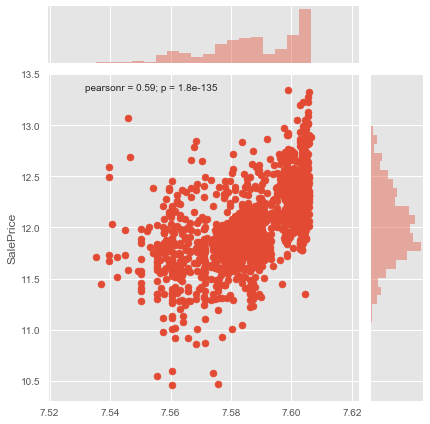

In [73]:
sns.jointplot(x=x1, y=y)

In [103]:
df.iloc[0, :]


LotFrontage               65.000
LotArea                    9.042
Street                     1.099
LotShape                   1.609
Utilities                  1.609
LandSlope                  1.386
OverallQual                7.000
OverallCond                1.792
YearBuilt                  7.603
YearRemodAdd            2003.000
MasVnrArea                 5.283
ExterQual                  1.609
ExterCond                  1.386
BsmtQual                   1.609
BsmtCond                   1.386
BsmtExposure               0.000
BsmtFinType1               6.000
BsmtFinSF1                 6.561
BsmtFinType2               0.693
BsmtFinSF2                 0.000
BsmtUnfSF                  5.017
TotalBsmtSF              856.000
HeatingQC                  1.792
1stFlrSF                   6.753
2ndFlrSF                   6.751
LowQualFinSF               0.000
GrLivArea                  7.445
BsmtFullBath               0.693
BsmtHalfBath               0.000
FullBath                   2.000
HalfBath  

In [104]:
df['GarageYrBlt']

0      7.603
1      7.589
2      7.602
3      7.600
4      7.601
5      7.598
6      7.603
7      7.588
8      7.566
9      7.570
10     7.584
11     7.604
12     7.582
13     7.604
14     7.581
15     7.597
16     7.586
17     7.585
18     7.603
19     7.580
20     7.604
21     7.566
22     7.602
23     7.589
24     7.585
25     7.605
26     7.604
27     7.605
28     7.580
29     7.561
30     7.561
31     7.584
32     7.605
33     7.581
34     7.604
35     7.603
36     7.599
37     7.578
38     7.578
39     7.591
40     7.584
41     7.581
42     7.593
43     7.590
44     7.581
45     7.604
46     7.603
47     7.604
48     7.591
49     7.584
50     7.600
51     7.594
52     7.583
53     7.592
54     7.582
55     7.583
56     7.601
57     7.603
58     7.604
59     7.588
60     7.604
61     7.568
62     7.604
63     7.596
64     7.600
65     7.603
66     7.586
67     7.603
68     7.574
69     7.578
70     7.588
71     7.595
72     7.600
73     7.596
74     7.558
75     7.588
76     7.579